In [2]:
import numpy as np

# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.

def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 100):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [3]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [4]:
ppoints = np.genfromtxt('points.csv',delimiter=',',usecols=(0,1))

Y=np.genfromtxt('points.csv',delimiter=',',usecols=(2))
    
    

In [5]:
y=trainPerceptronAlgorithm(ppoints,Y)



In [8]:
def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

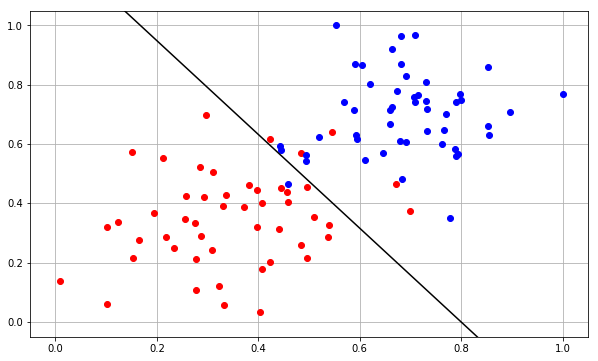

In [33]:
plt.figure(figsize=(10,6))
plt.grid(True)
for input,target in zip(ppoints,Y):
    plt.plot(input[0],input[1],'ro' if (target == 1.0) else 'bo')

#for i in range(30):
 #   display(y[i][0],y[i][1],'black')
display(y[30][0],y[30][1],'black')
plt.show()